In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/sample_submission.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/7550347fa2bb96c2354a3716dfa3a69c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74b23792db329cff5843e36efb8aa65a.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/94568a546be103177cb582d3e91cd2d8.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/6da36354fc904b63bc03eb3884e0c35c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5b3620a56668010877cfafa9322e18b5.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5157d5c9b1f0004b29310652ea54e825.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74897408dcbd69ef7c76cbbbbeb722d6.dicom
/kaggle/input/vi

In [2]:
base = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"


In [3]:
import os

file_path = base + "train.csv"
size_mb = os.path.getsize(file_path) / (1024*1024)
size_mb


4.435338973999023

In [4]:
import pandas as pd

base = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"

df_train = pd.read_csv(base + "train.csv")
df_sample = pd.read_csv(base + "sample_submission.csv")

print("Train shape:", df_train.shape)
df_train.head()


Train shape: (67914, 8)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [5]:
print("Train shape:", df_train.shape)
print("\nColumns:", df_train.columns)

df_train.info()
df_train.describe(include="all")


Train shape: (67914, 8)

Columns: Index(['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min',
       'x_max', 'y_max'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67914 entries, 0 to 67913
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_id    67914 non-null  object 
 1   class_name  67914 non-null  object 
 2   class_id    67914 non-null  int64  
 3   rad_id      67914 non-null  object 
 4   x_min       36096 non-null  float64
 5   y_min       36096 non-null  float64
 6   x_max       36096 non-null  float64
 7   y_max       36096 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.1+ MB


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
count,67914,67914,67914.000000,67914,36096.000000,36096.000000,36096.000000,36096.000000
unique,15000,15,NaN,17,NaN,NaN,NaN,NaN
top,03e6ecfa6f6fb33dfeac6ca4f9b459c9,No finding,NaN,R9,NaN,NaN,NaN,NaN
freq,57,31818,NaN,15708,NaN,NaN,NaN,NaN
mean,NaN,NaN,9.979312,NaN,1051.332696,1065.262051,1492.269337,1456.660489
std,NaN,NaN,5.036494,NaN,565.838078,552.925133,595.384126,581.134138
min,NaN,NaN,0.000000,NaN,0.000000,0.000000,68.000000,103.000000
25%,NaN,NaN,7.000000,NaN,602.000000,627.000000,1010.000000,1009.000000
50%,NaN,NaN,13.000000,NaN,1014.500000,935.000000,1567.000000,1411.000000
75%,NaN,NaN,14.000000,NaN,1457.000000,1471.000000,1947.000000,1911.000000


In [6]:
df_train['class_name'].value_counts()


class_name
No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: count, dtype: int64

In [7]:
(df_train['class_name'] == "No finding").sum()


31818

In [8]:
df_train['image_id'].nunique()


15000

In [9]:
df_train.isna().sum()


image_id          0
class_name        0
class_id          0
rad_id            0
x_min         31818
y_min         31818
x_max         31818
y_max         31818
dtype: int64

(-0.5, 1993.5, 2429.5, -0.5)

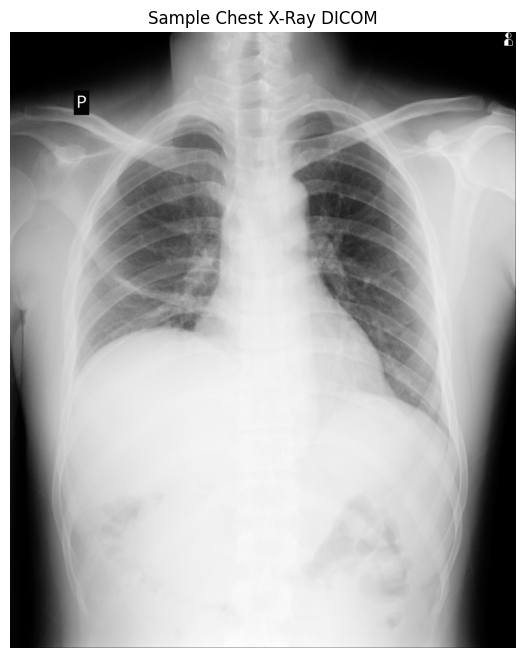

In [10]:
import pydicom
import matplotlib.pyplot as plt
import random

test_path = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/"

sample_file = random.choice(os.listdir(test_path))
dicom_path = os.path.join(test_path, sample_file)

ds = pydicom.dcmread(dicom_path)
img = ds.pixel_array

plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.title("Sample Chest X-Ray DICOM")
plt.axis('off')


In [13]:
import cv2

def load_dicom_image(path):
    d = pydicom.dcmread(path)
    img = d.pixel_array.astype(float)
    img = (img - img.min()) / (img.max() - img.min()) 
    img = (img * 255).astype("uint8")                  
    return img


In [14]:
def preprocess_image(img, size=512):
    img = cv2.resize(img, (size, size))
    img = img / 255.0
    return img
